In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.5/983.5 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 77.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 66.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 60.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 125.9 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="bqNXvS3FB5qSAsYPEIJx")
project = rf.workspace("shfarhaan").project("angiographic-dataset-for-stenosis-detection")
version = project.version(7)
dataset = version.download("yolov5")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Angiographic-Dataset-For-Stenosis-Detection-7 in yolov5pytorch:: 100%|██████████| 16662/16662 [00:01<00:00, 8336.36it/s]


In [ ]:
!unzip -q /content/angiography.zip -d /content/custom_data

unzip:  cannot find or open /content/angiography.zip, /content/angiography.zip.zip or /content/angiography.zip.ZIP.


In [ ]:
import yaml
import os

def create_data_yaml(path_to_classes_txt, path_to_data_yaml, train_images_dir, train_labels_dir, val_images_dir, val_labels_dir):
    # Read classes.txt
    if not os.path.exists(path_to_classes_txt):
        print(f'classes.txt file not found! Please create a classes.txt labelmap and move it to {path_to_classes_txt}')
        return

    with open(path_to_classes_txt, 'r') as f:
        classes = [line.strip() for line in f.readlines() if line.strip()]

    # Create data dictionary
    data = {
        'path': '/content/custom_data',
        'train': train_images_dir,
        'val': val_images_dir,
        'nc': len(classes),
        'names': classes
    }

    # Write data to YAML file
    with open(path_to_data_yaml, 'w') as f:
        yaml.dump(data, f, sort_keys=False)
    print(f'Created config file at {path_to_data_yaml}')

# Define paths
path_to_classes_txt = '/content/custom_data/classes.txt'
path_to_data_yaml = '/content/data.yaml'
train_images_dir = '/content/custom_data/train/images'
train_labels_dir = '/content/custom_data/train/labelTxt'  # Note: changed from labelTxt to labels
val_images_dir = '/content/custom_data/valid/images'
val_labels_dir = '/content/custom_data/valid/labelTxt'

create_data_yaml(path_to_classes_txt, path_to_data_yaml, train_images_dir, train_labels_dir, val_images_dir, val_labels_dir)

Created config file at /content/data.yaml


In [ ]:
!yolo detect train data=/content/data.yaml model=yolo11n.pt epochs=60 imgsz=512

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
100% 5.35M/5.35M [00:00<00:00, 84.4MB/s]
Ultralytics 8.3.115 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/data.yaml, epochs=60, time=None, patience=100, batch=16, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, io

In [ ]:
!yolo detect predict model=/content/runs/detect/train/weights/best.pt source=custom_data/valid/images save=True

Ultralytics 8.3.115 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs

image 1/1249 /content/custom_data/valid/images/14_002_5_0022_bmp.rf.4f011fe1623bbd575809e5d94b54c058.jpg: 512x512 1 stenosis, 26.1ms
image 2/1249 /content/custom_data/valid/images/14_002_5_0030_bmp.rf.7ce8cc81f3241cd8b4fbdf5c08fafc55.jpg: 512x512 1 stenosis, 24.5ms
image 3/1249 /content/custom_data/valid/images/14_002_5_0032_bmp.rf.2b834caddc306748d22a71d35fa1aee3.jpg: 512x512 1 stenosis, 20.5ms
image 4/1249 /content/custom_data/valid/images/14_002_5_0033_bmp.rf.666f6a20e892e90efbf3dd33dadbd890.jpg: 512x512 1 stenosis, 37.3ms
image 5/1249 /content/custom_data/valid/images/14_002_5_0037_bmp.rf.ff92c19326f28f9d6a5fbc26d5420d29.jpg: 512x512 1 stenosis, 24.3ms
image 6/1249 /content/custom_data/valid/images/14_002_5_0039_bmp.rf.815b9a2bab353d71780229a5be9bacf0.jpg: 512x512 1 stenosis, 8.3ms
image 7/1249 /content/custom_data/va

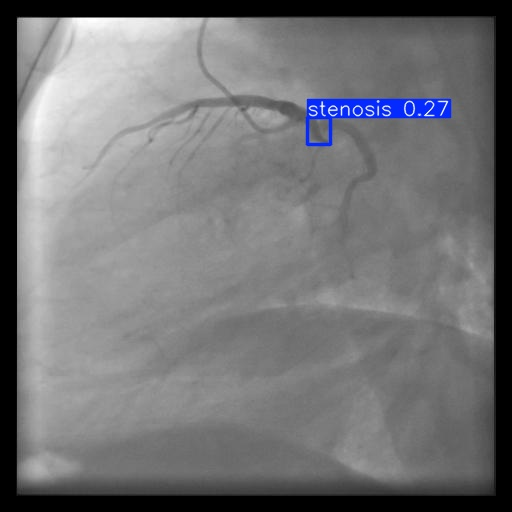

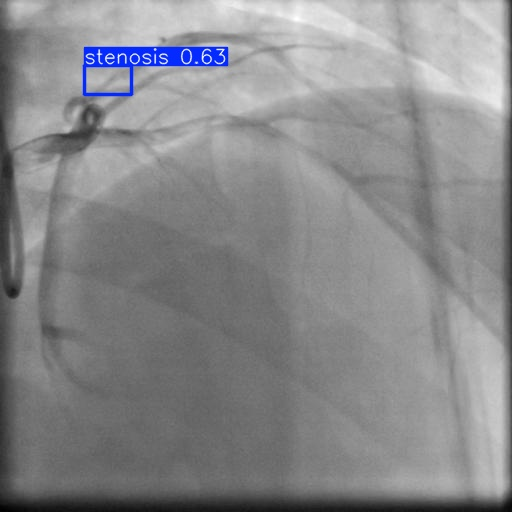

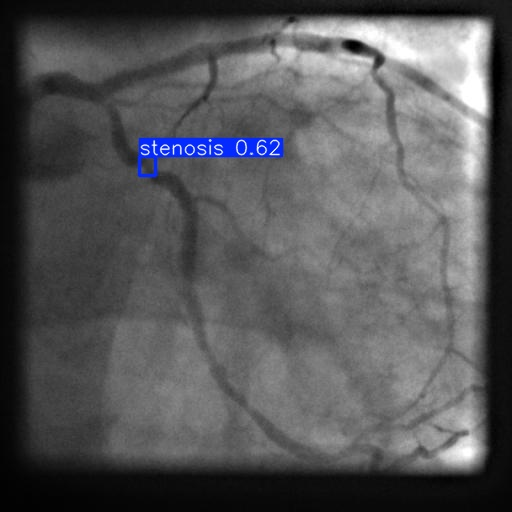

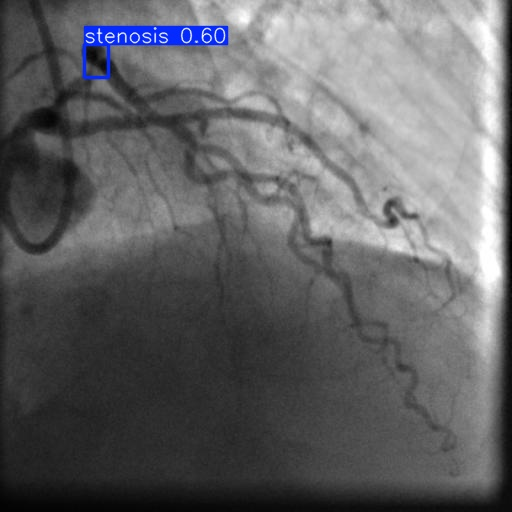

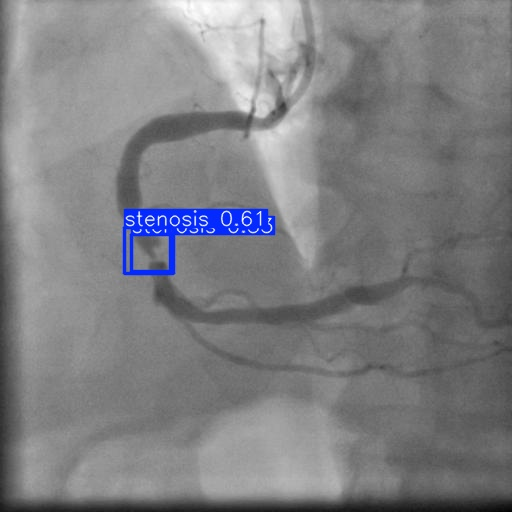

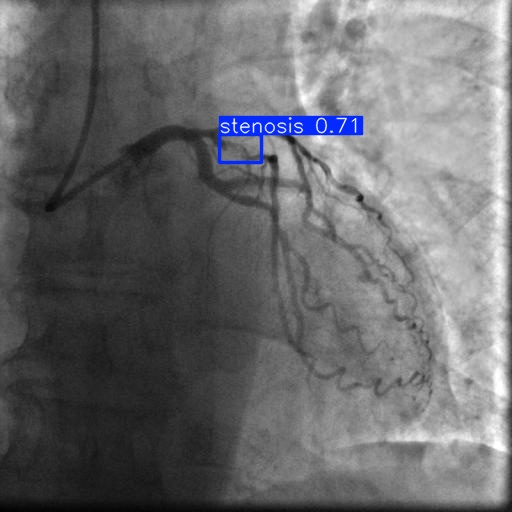

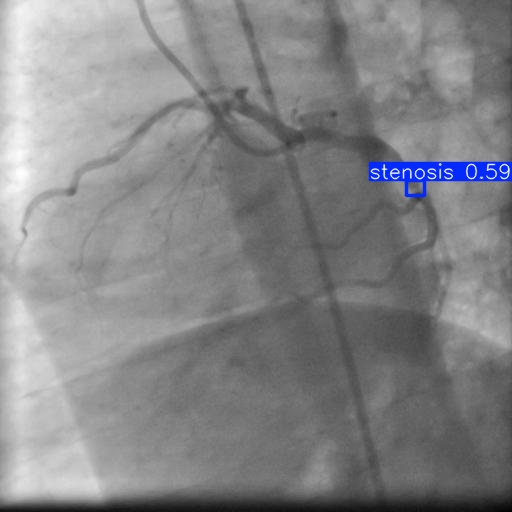

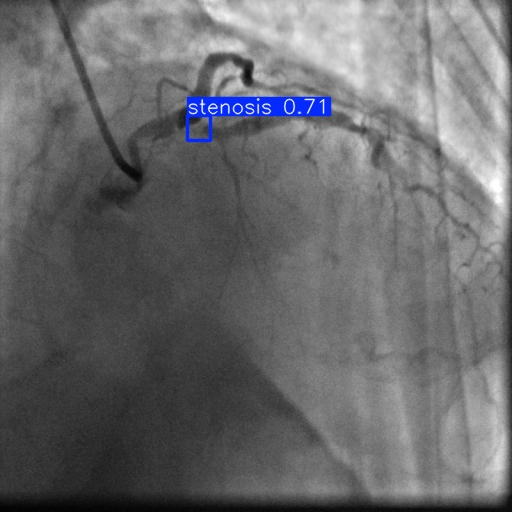

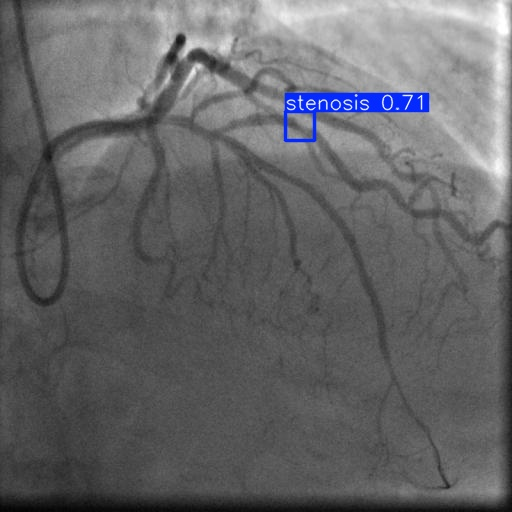

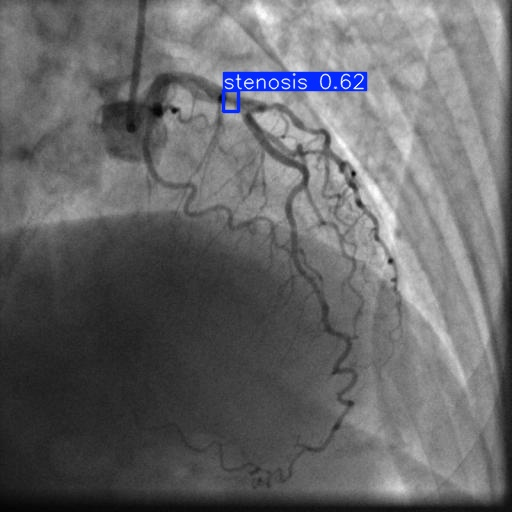

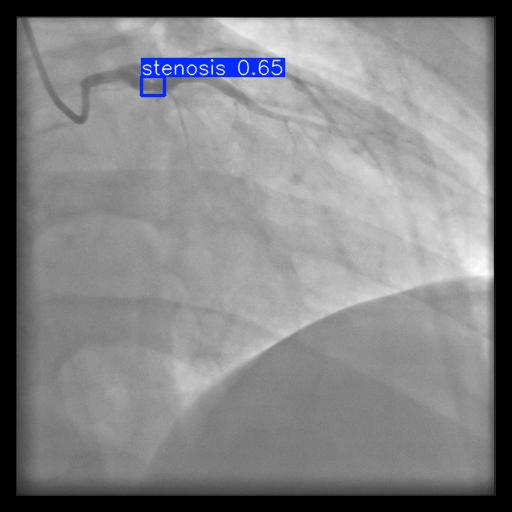

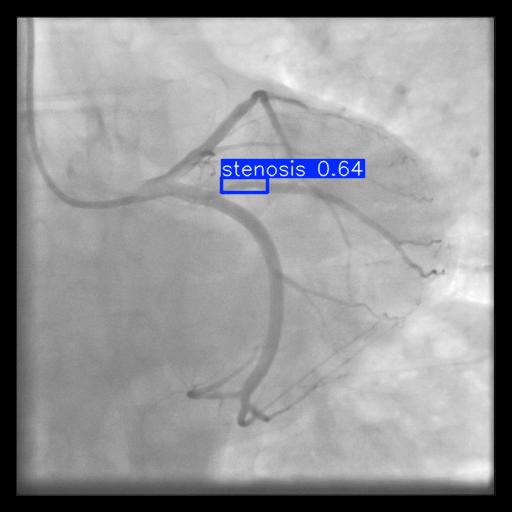

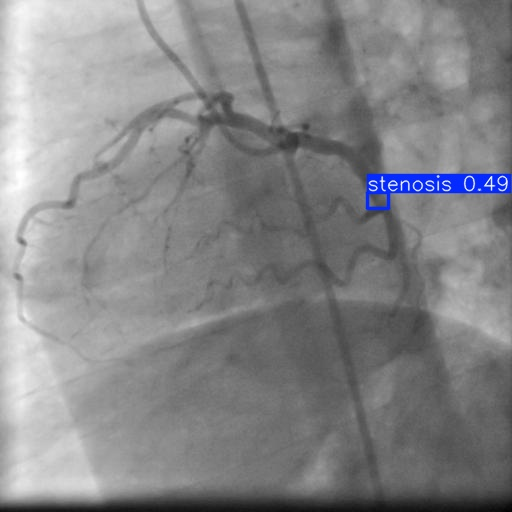

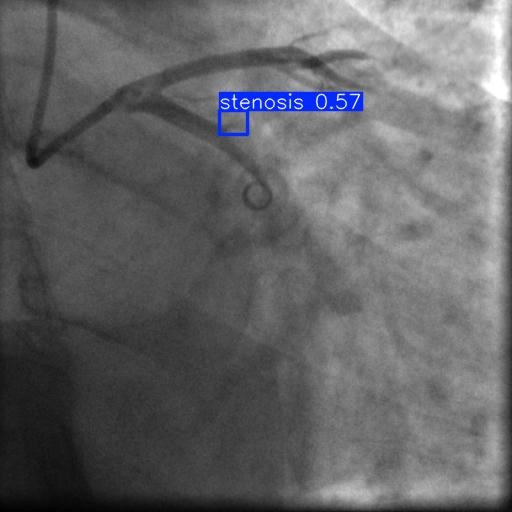

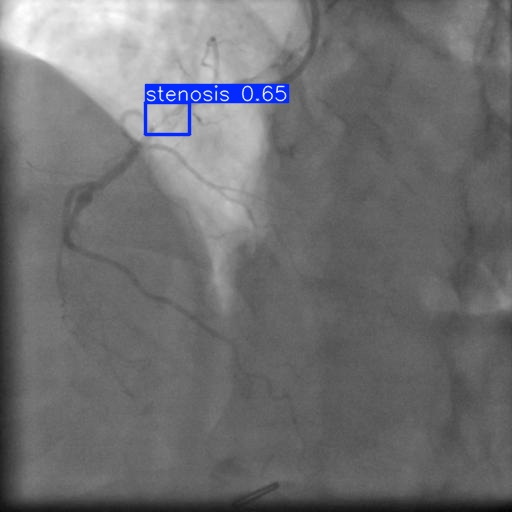

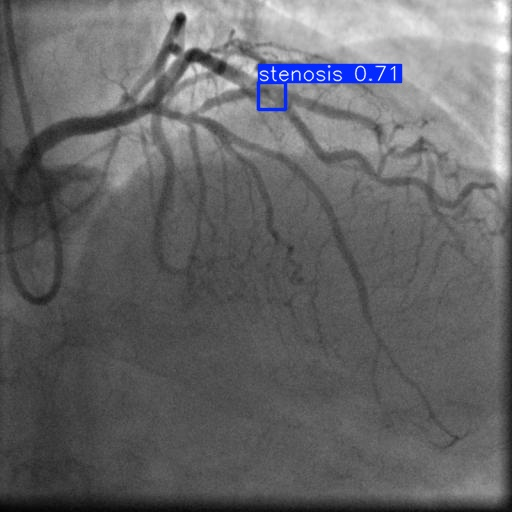

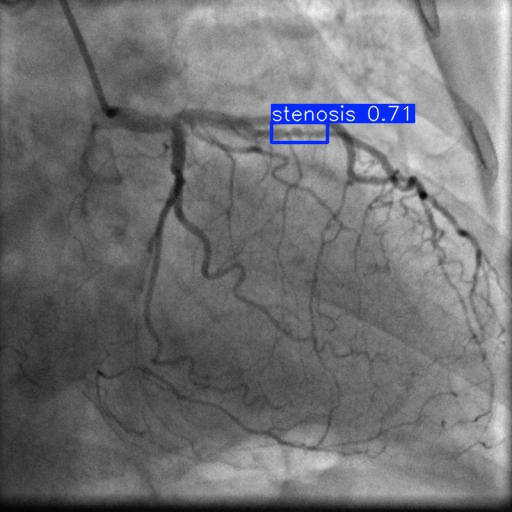

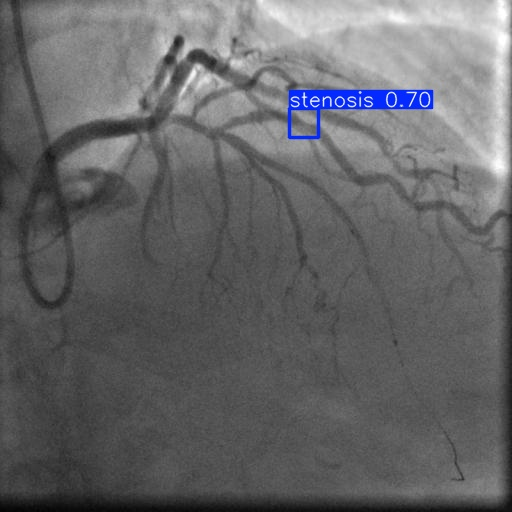

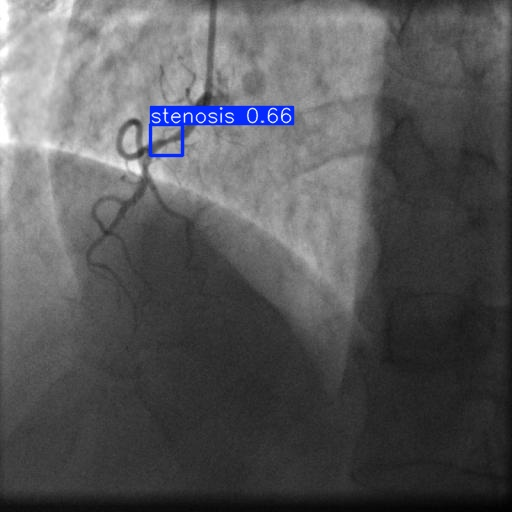

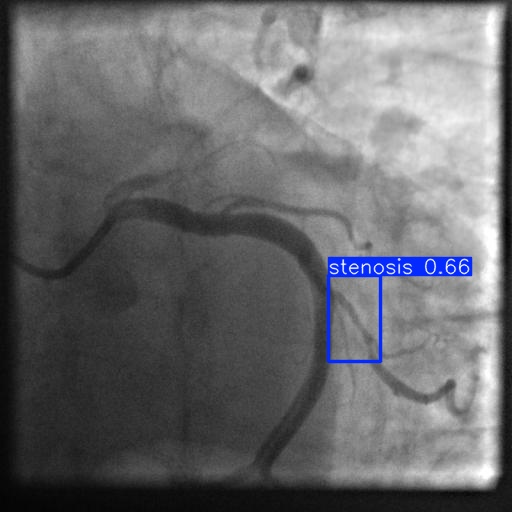

In [ ]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[:20]:
  display(Image(filename=image_path, height=400))
  print('\n')

In [ ]:
!mkdir /content/My_model2
!cp /content/runs/detect/train/weights/best.pt /content/My_model2/my_model.pt
!cp -r /content/runs/detect/train /content/my_model2

# Zip into "my_model.zip"
%cd My_model2
!zip /content/My_model2.zip my_model.pt
!zip -r /content/My_model2.zip train
%cd /content

/content/My_model2
  adding: my_model.pt (deflated 10%)
	zip warning: name not matched: train

zip error: Nothing to do! (try: zip -r /content/My_model2.zip . -i train)
/content


In [ ]:
from google.colab import files

files.download('/content/my_model2.zip')